# Synthetic survey data generator

In [1]:
!pip3 install names
!pip3 install rstr


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [115]:
import random
import pandas as pd
import numpy as np
from scipy.stats import skewnorm
import seaborn as sns

# for random strings generation
import rstr

# for random names generation
import names

In [116]:
# defaults 
NO_OF_RECORDS = 500
FILENAME = "simulated_data"

In [117]:
# NRIC generator
def generate_nric(): 
    return rstr.xeger(r'^[STFG]\d{7}[A-Z]$')

In [120]:
"""
Sample survey data
|---------- |-----------------|---------------|--------|-----------|
| NRIC      | researcher_name | sector        | salary | degree    | 
|---------- |------------------------------------------------------|
| T8270500P | Ted Osborn      | Agricultural  | 6000   | Masters   |
| S6754779S | Edith Ward      | Aerospace     | 5000   | Bachelors |
| G4976879R | Eric Heard      | Engineering   | 7000   | Masters   |
| S4190526H | Franklin Brod   | Healthcare    | 9000   | PhD       |
|------------------------------------------------------------------|

Types:
NRIC: string 
researcher_name: string 
sector: string (categorical)
salary: int 
degree: int (categorical) 
"""

# categorical attributes 
SECTOR_TYPES = ["Agricultural", "Aerospace", "Engineering", "Healthcare"] 
QUALIFICATION_TYPES = ["PhD", "Masters", "Bachelors", "Non-degree", "Post-grad"]

# constants
SKEW_PARAM = 2
SALARY_RANGE = [4000, 15000]

# NATIONALITY_TYPES = ["SC", "PR", "FC"]

def create_simulated_data(no_of_records=NO_OF_RECORDS):
    simulated_data = pd.DataFrame()
    
    # NRIC
    simulated_data["NRIC"] = [generate_nric() for _ in range(0, no_of_records)]
    
    # researcher_name
    simulated_data["researcher_name"] = [names.get_full_name() for _ in range(0, no_of_records)]
    
    # sector
    simulated_data["sector"] = np.random.choice(SECTOR_TYPES, size=no_of_records) 
    
    # salary
    simulated_data["salary"] = abs(skewnorm.rvs(SKEW_PARAM, size=no_of_records))*SALARY_RANGE[0] + SALARY_RANGE[0]
    #np.random.randint(SALARY_RANGE[0], SALARY_RANGE[1], size=no_of_records)
    # using gamma distribution 
    # https://en.wikipedia.org/wiki/Gamma_distribution
    # simulated_data["salary"] = np.round(np.random.gamma(10, 300, size=no_of_records), 2)

    # degree
    simulated_data["degree"] = np.random.choice(QUALIFICATION_TYPES, size=no_of_records) 
     
    return simulated_data

In [123]:
no_of_records = [200, 500, 1000, 10000]
for n in no_of_records:
    simulated_data = create_simulated_data(n)
    simulated_data.to_csv(f"data/{FILENAME}_{n}.csv", mode='w', index=False)

In [122]:
simulated_data

,NRIC,researcher_name,sector,salary,degree
0,S9268280T,Willie Mize,Aerospace,6203.461818,Bachelors
1,S4975476Y,Cindy East,Aerospace,6187.320903,Masters
2,T0086498S,James Nelson,Engineering,8654.193118,Bachelors
3,S2874305N,Amy Skiver,Agricultural,5205.116851,Bachelors
4,F1367051X,Roy Duncan,Engineering,11460.761533,Bachelors
...,...,...,...,...,...
9995,T2064926G,Margaret Anderson,Engineering,4433.660264,Post-grad
9996,S4763975W,Lisa Charleston,Agricultural,5952.295431,Non-degree
9997,F9439971M,Deanna Hill,Aerospace,4309.339768,Bachelors
9998,G3762017W,Constance Hamrick,Agricultural,9354.935459,Post-grad


### Salary skewed distribution

<AxesSubplot:xlabel='salary', ylabel='Count'>

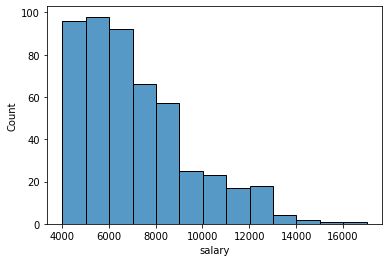

In [114]:
sns.histplot(data=simulated_data['salary'], binwidth=1000)